In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob

plt.style.use("seaborn-poster")

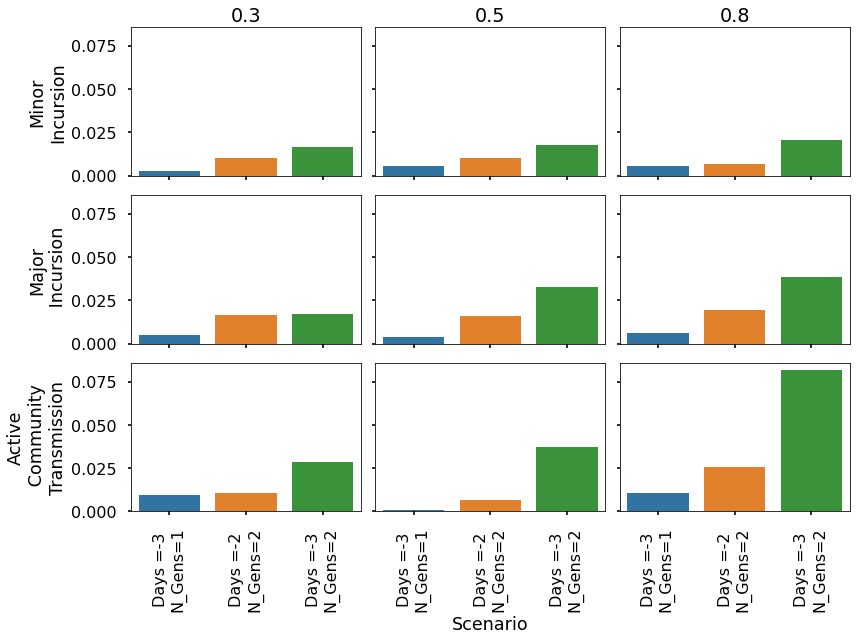

In [8]:
n = 10004
Days_list = (-3,-2)

inits=(1,2,10)
detects=(0.3,0.5,0.8)
path = "results/"+str(n)+"allpc_days_"


# Grouped bar plot
fig,ax = plt.subplots(figsize=(12,9), 
                      nrows=len(inits), ncols=len(detects),
                     sharex=True, sharey=True
                     )

ylabel ={
    1:"Minor\nIncursion",
    2:"Major\n Incursion",
    10:"Active\n Community\nTransmission",
}

for i,init in enumerate(inits):
    for j, detect in enumerate(detects):
        
        df = pd.DataFrame()
        for days in ("-3","-2"):#,"-1","0"):
            for gens in ("1","2"):
                for file in glob.glob(path+"*"+days+"init_"+str(init)+"_detect"+str(detect)+"_gens"+gens+".csv"):
                    temp = pd.read_csv(file)
                    #temp['detect'] = float(detect)
                    temp['N_Gens'] = int(gens)
                    df = df.append(temp)
        df.pc = ["$%s$" % x for x in df.pc]
        df.DAYS = df.DAYS.astype(int)

        nrow = i
        ncol = j


        df_plot = df

        ## Filter to days = -2,-3
        day_list = [-1, 0]
        df_plot = df_plot[~df_plot.DAYS.isin(day_list)]

        # Filter to detect = 0.1
        df_plot = df_plot.loc[df_plot.detect==detect]
        mean_col = df_plot.groupby(['DAYS','pc','N_Gens']).die_out.mean().reset_index()
        mean_col = mean_col.sort_values(by=['N_Gens'],ascending=False)

        # Baseline information
        mean_col_baseline = mean_col.loc[mean_col.DAYS==-2]
        mean_col_baseline = mean_col_baseline.loc[mean_col_baseline.N_Gens==1]
        baseline_probs = mean_col_baseline['die_out']
        baseline_probs = [baseline_probs]*4
        baseline_probs_flat = []
        for sublist in baseline_probs:
            for item in sublist:
                baseline_probs_flat.append(item)
        # Add baseline to data frame
        mean_col['Baseline'] = baseline_probs_flat
        #print(mean_col)
        # Calculate difference between basline 
        mean_col['Improvement'] = mean_col['die_out'] - mean_col['Baseline']



        mean_col["Scenario"] = 'Days =' +  mean_col["DAYS"].astype(str) + ', N_Gens=' + mean_col["N_Gens"].astype(str)

        mean_col = mean_col.loc[mean_col.Scenario!='Days =-2, N_Gens=1']

        sns.barplot(x='Scenario',
                    order=["Days =-3, N_Gens=1", "Days =-2, N_Gens=2", "Days =-3, N_Gens=2"],
                    y='Improvement',
                    data=mean_col.loc[mean_col.pc=='$0.9$'],
                    #hue='pc',
                    errwidth=0,
                   ax = ax[nrow,ncol]
                   )
        if nrow==len(inits)-1:
            ax[nrow,ncol].set_xticklabels(["Days =-3\nN_Gens=1", "Days =-2\nN_Gens=2", "Days =-3\nN_Gens=2"])
            ax[nrow,ncol].tick_params(axis='x',rotation=90)
        elif nrow==0:
            ax[nrow,ncol].set_title(detect)

        ax[nrow,ncol].set_xlabel("")
        #ax[nrow,ncol].set_yticks([-0.025,0.,0.025,0.05,0.075,0.1])    
        if ncol==0:
            ax[nrow,ncol].set_ylabel(ylabel[init])
        else:
            ax[nrow,ncol].set_ylabel("")

#ax.set_ylabel("Improvement in  30-day elimination probability")
#ax.set_title("")
ax[len(inits)-1,1].set_xlabel("Scenario")
plt.tight_layout()
plt.savefig("./figs/Improvements"+str(n)+".png", dpi=120)
plt.show()


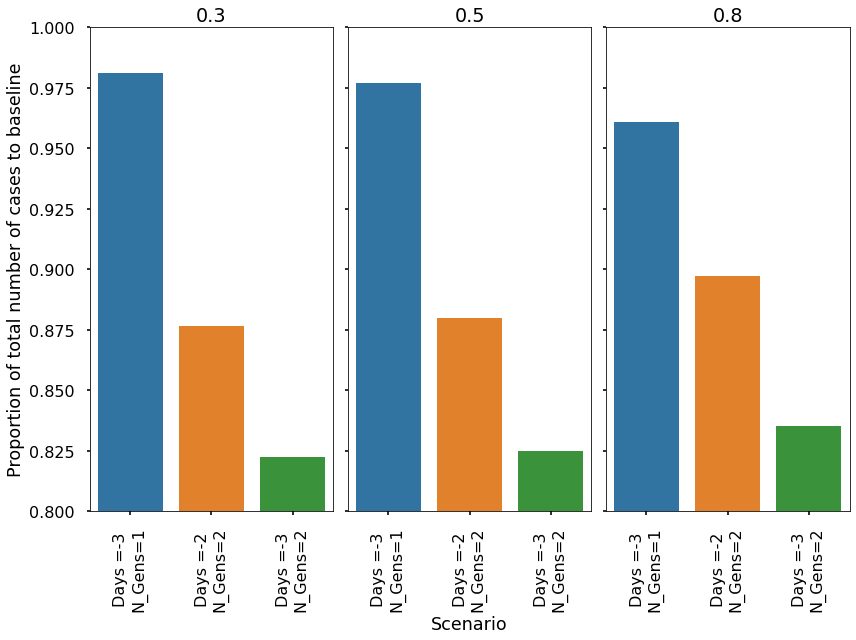

In [3]:
#n = 10001
inits=[10]


# Grouped bar plot of CASES
fig,ax = plt.subplots(figsize=(12,9), 
                      nrows=len(inits), ncols=len(detects),
                     sharex=True, sharey=True, squeeze=False,
                     )

ylabel ={
    1:"Minor\nIncursion",
    2:"Major\n Incursion",
    10:"Active\n Community\nTransmission",
}

for i,init in enumerate(inits):
    for j, detect in enumerate(detects):
        
        df = pd.DataFrame()
        for days in ("-3","-2","-1","0"):
            for gens in ("1","2"):
                for file in glob.glob(path+"*"+days+"init_"+str(init)+"_detect"+"*"+str(detect)+"_gens"+gens+".csv"):
                    temp = pd.read_csv(file)
                    #temp['detect'] = float(detect)
                    temp['N_Gens'] = int(gens)
                    df = df.append(temp)
        df.pc = ["$%s$" % x for x in df.pc]
        df.DAYS = df.DAYS.astype(int)


        nrow = i
        ncol = j


        df_plot = df

        ## Filter to days = -2,-3
        day_list = [-1, 0]
        df_plot = df_plot[~df_plot.DAYS.isin(day_list)]

        # Filter to detect = 0.1
        df_plot = df_plot.loc[df_plot.detect==detect]
        mean_col = df_plot.groupby(['DAYS','pc','N_Gens']).cases.mean().reset_index()
        mean_col = mean_col.sort_values(by=['N_Gens'],ascending=False)

        # Baseline information
        mean_col_baseline = mean_col.loc[mean_col.DAYS==-2]
        mean_col_baseline = mean_col_baseline.loc[mean_col_baseline.N_Gens==1]
        baseline_probs = mean_col_baseline['cases']
        baseline_probs = [baseline_probs]*4
        baseline_probs_flat = []
        for sublist in baseline_probs:
            for item in sublist:
                baseline_probs_flat.append(item)

        # Add baseline to data frame
        mean_col['Baseline'] = baseline_probs_flat
        #print(mean_col)
        # Calculate difference between basline 
        mean_col['Cases'] = mean_col['cases'] / mean_col['Baseline']



        mean_col["Scenario"] = 'Days =' +  mean_col["DAYS"].astype(str) + ', N_Gens=' + mean_col["N_Gens"].astype(str)

        mean_col = mean_col.loc[mean_col.Scenario!='Days =-2, N_Gens=1']
        mean_col = mean_col.sort_values("Scenario")

        sns.barplot(x='Scenario',
                    order=["Days =-3, N_Gens=1", "Days =-2, N_Gens=2", "Days =-3, N_Gens=2"],
                    y='Cases',
                    data=mean_col.loc[mean_col.pc=='$0.9$'],
                    #hue='pc',
                    #errwidth=0,
                   ax = ax[nrow,ncol]
                   )
        ax[nrow,ncol].set_ylim((0.8,1))
        if nrow==len(inits)-1:
            ax[nrow,ncol].set_xticklabels(["Days =-3\nN_Gens=1", "Days =-2\nN_Gens=2", "Days =-3\nN_Gens=2"])
            ax[nrow,ncol].tick_params(axis='x',rotation=90)
        elif nrow==0:
            ax[nrow,ncol].set_title(detect)

        ax[nrow,ncol].set_xlabel("")
        ax[nrow,ncol].set_title(detect)    
        if ncol==0:
            ax[nrow,ncol].set_ylabel(ylabel[init])
        else:
            ax[nrow,ncol].set_ylabel("")
        

ax[0,0].set_ylabel("Proportion of total number of cases to baseline")
#ax.set_title("")
ax[len(inits)-1,1].set_xlabel("Scenario")
plt.tight_layout()
plt.savefig("./figs/Cases"+str(n)+".png", dpi=120)
plt.show()

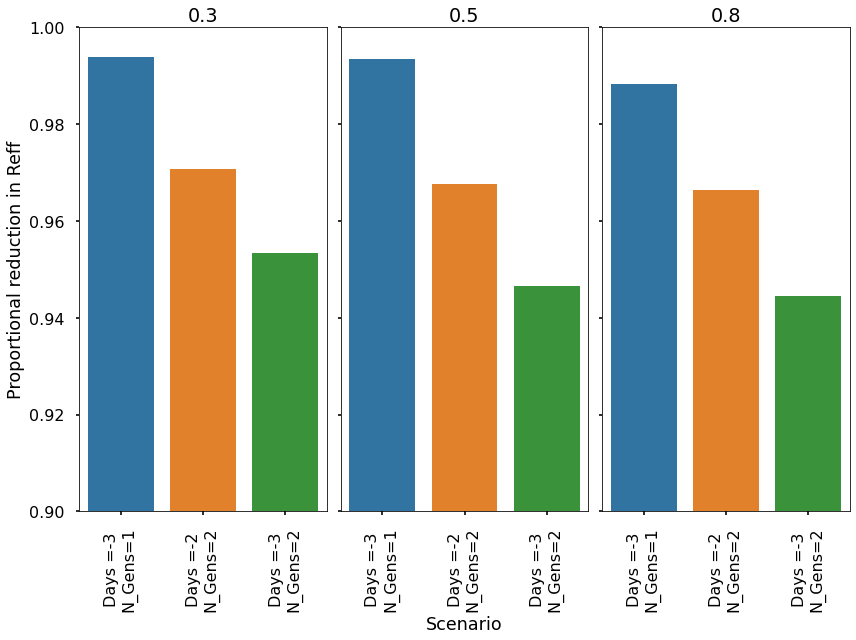

In [4]:

inits=[10]


# Grouped bar plot of Reff
fig,ax = plt.subplots(figsize=(12,9), 
                      nrows=len(inits), ncols=len(detects),
                     sharex=True, sharey=True, squeeze=False,
                     )

ylabel ={
    1:"Minor\nIncursion",
    2:"Major\n Incursion",
    10:"Active\n Community\nTransmission",
}

for i,init in enumerate(inits):
    for j, detect in enumerate(detects):
        
        df = pd.DataFrame()
        for days in ("-3","-2","-1","0"):
            for gens in ("1","2"):
                for file in glob.glob(path+"*"+days+"init_"+str(init)+"_detect"+"*"+str(detect)+"_gens"+gens+".csv"):
                    temp = pd.read_csv(file)
                    #temp['detect'] = float(detect)
                    temp['N_Gens'] = int(gens)
                    df = df.append(temp)
        df.pc = ["$%s$" % x for x in df.pc]
        df.DAYS = df.DAYS.astype(int)


        nrow = i
        ncol = j


        df_plot = df

        ## Filter to days = -2,-3
        day_list = [-1, 0]
        df_plot = df_plot[~df_plot.DAYS.isin(day_list)]

        # Filter to detect = 0.1
        df_plot = df_plot.loc[df_plot.detect==detect]
        mean_col = df_plot.groupby(['DAYS','pc','N_Gens']).secondary_cases_mean.mean().reset_index()
        mean_col = mean_col.sort_values(by=['N_Gens'],ascending=False)

        # Baseline information
        mean_col_baseline = mean_col.loc[mean_col.DAYS==-2]
        mean_col_baseline = mean_col_baseline.loc[mean_col_baseline.N_Gens==1]
        baseline_probs = mean_col_baseline['secondary_cases_mean']
        baseline_probs = [baseline_probs]*4
        baseline_probs_flat = []
        for sublist in baseline_probs:
            for item in sublist:
                baseline_probs_flat.append(item)

        # Add baseline to data frame
        mean_col['Baseline'] = baseline_probs_flat
        #print(mean_col)
        # Calculate difference between basline 
        mean_col['Reff'] = mean_col['secondary_cases_mean'] / mean_col['Baseline']



        mean_col["Scenario"] = 'Days =' +  mean_col["DAYS"].astype(str) + ', N_Gens=' + mean_col["N_Gens"].astype(str)

        mean_col = mean_col.loc[mean_col.Scenario!='Days =-2, N_Gens=1']
        mean_col = mean_col.sort_values("Scenario")

        sns.barplot(x='Scenario',
                    order=["Days =-3, N_Gens=1", "Days =-2, N_Gens=2", "Days =-3, N_Gens=2"],
                    y='Reff',
                    data=mean_col.loc[mean_col.pc=='$0.9$'],
                    #hue='pc',
                    #errwidth=0,
                   ax = ax[nrow,ncol]
                   )
        ax[nrow,ncol].set_ylim((0.9,1))
        if nrow==len(inits)-1:
            ax[nrow,ncol].set_xticklabels(["Days =-3\nN_Gens=1", "Days =-2\nN_Gens=2", "Days =-3\nN_Gens=2"])
            ax[nrow,ncol].tick_params(axis='x',rotation=90)
        elif nrow==0:
            ax[nrow,ncol].set_title(detect)

        ax[nrow,ncol].set_xlabel("")
        ax[nrow,ncol].set_title(detect)    
        if ncol==0:
            ax[nrow,ncol].set_ylabel(ylabel[init])
        else:
            ax[nrow,ncol].set_ylabel("")
        

ax[0,0].set_ylabel("Proportional reduction in Reff")
#ax.set_title("")
ax[len(inits)-1,1].set_xlabel("Scenario")
plt.tight_layout()
plt.savefig("./figs/Reff"+str(n)+".png", dpi=120)
plt.show()

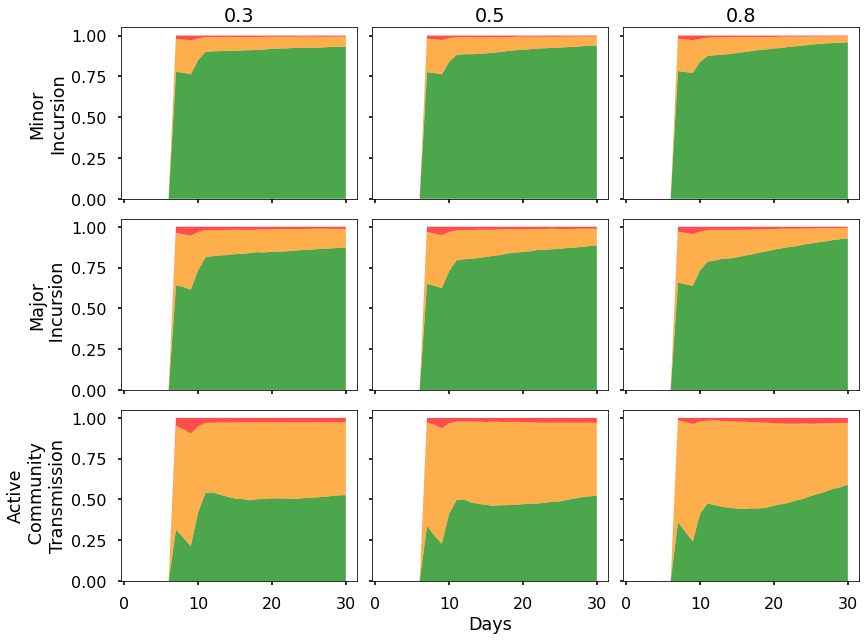

In [5]:
##Amber lighting for tplusn
#10001 is when at test capacity initially

inits=[1,2,10]
pc = 0.9

tplusn = [str(k) for k in range(30)]
# Grouped bar plot of CASES
fig,ax = plt.subplots(figsize=(12,9), 
                      nrows=len(inits), ncols=len(detects),
                     sharex=True, sharey=True, squeeze=False,
                     )

ylabel ={
    1:"Minor\nIncursion",
    2:"Major\n Incursion",
    10:"Active\n Community\nTransmission",
}

for i,init in enumerate(inits):
    for j, detect in enumerate(detects):
        nrow =i
        ncol = j
        df = pd.DataFrame()
        for days in ("-2"):
            for gens in ("1"):
                for file in glob.glob(path+"*"+days+"init_"+str(init)+"_detect"+"*"+str(detect)+"_gens"+gens+".csv"):
                    temp = pd.read_csv(file)
                    #temp['detect'] = float(detect)
                    temp['N_Gens'] = int(gens)
                    temp = temp.loc[temp.pc==pc]

        
        green = temp[tplusn].rolling(7,axis=1).mean().applymap(lambda x: x<=0.10)
        amber = temp[tplusn].rolling(7,axis=1).mean().applymap(lambda x: (x<0.25) & (x>0.10))
        red = temp[tplusn].rolling(7,axis=1).mean().applymap(lambda x: x>=0.25)
        
        ax[i,j].stackplot(range(1,31), green.mean(axis=0),amber.mean(axis=0),red.mean(axis=0),
                          colors=('green', 'darkorange','red'), alpha=0.7
                            )
        #for k in range(5):
            #ax[i,j].plot(range(1,31), temp.loc[temp.sim==k*3, tplusn].rolling(7,axis=1).mean().values[0,:], color='black', alpha=0.8, linewidth=0.4)
        if nrow==0:
            ax[nrow,ncol].set_title(detect)
        if nrow==len(inits)-1:
            ax[nrow,1].set_xlabel("Days")
        else:
            ax[nrow,ncol].set_xlabel("")
            
        if ncol==0:
            ax[nrow,ncol].set_ylabel(ylabel[init])
        else:
            ax[nrow,ncol].set_ylabel("")
            
plt.tight_layout()
plt.savefig("figs/traffic_COP_tplusn_"+str(n)+".png",dpi=120)
plt.show()

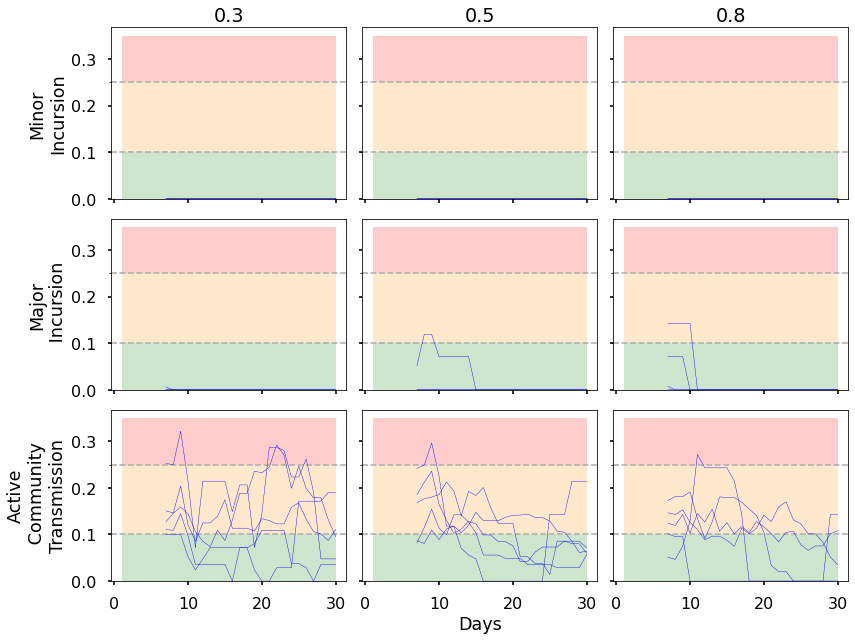

In [6]:
##Amber lighting for tplusn
#10001 is when at test capacity initially

inits=[1,2,10]
pc = 0.9

tplusn = [str(k) for k in range(30)]
# Grouped bar plot of CASES
fig,ax = plt.subplots(figsize=(12,9), 
                      nrows=len(inits), ncols=len(detects),
                     sharex=True, sharey=True, squeeze=False,
                     )

ylabel ={
    1:"Minor\nIncursion",
    2:"Major\n Incursion",
    10:"Active\n Community\nTransmission",
}

for i,init in enumerate(inits):
    for j, detect in enumerate(detects):
        nrow =i
        ncol = j
        df = pd.DataFrame()
        for days in ("-2"):
            for gens in ("1"):
                for file in glob.glob(path+"*"+days+"init_"+str(init)+"_detect"+"*"+str(detect)+"_gens"+gens+".csv"):
                    temp = pd.read_csv(file)
                    #temp['detect'] = float(detect)
                    temp['N_Gens'] = int(gens)
                    temp = temp.loc[temp.pc==pc]

        
        #green = temp[tplusn].rolling(7,axis=1).mean().applymap(lambda x: x<=0.10)
        #amber = temp[tplusn].rolling(7,axis=1).mean().applymap(lambda x: (x<0.25) & (x>0.10))
        #red = temp[tplusn].rolling(7,axis=1).mean().applymap(lambda x: x>=0.25)
        
        ax[i,j].stackplot(range(1,31),[0.1]*30 ,[0.15]*30,[0.1]*30,
                          colors=('green', 'darkorange','red'), alpha=0.2
                            )
        ax[i,j].set_yticks([0.101,0.25],minor=True)
        ax[i,j].grid(which="minor",axis='y', linestyle='dashed')

        for k in range(5):
            ax[i,j].plot(range(1,31), temp.loc[temp.sim==k*3, tplusn].rolling(7,axis=1).mean().values[0,:], color='blue', alpha=1, linewidth=0.4)
        if nrow==0:
            ax[nrow,ncol].set_title(detect)
        if nrow==len(inits)-1:
            ax[nrow,1].set_xlabel("Days")
        else:
            ax[nrow,ncol].set_xlabel("")
            
        if ncol==0:
            ax[nrow,ncol].set_ylabel(ylabel[init])
        else:
            ax[nrow,ncol].set_ylabel("")
            
plt.tight_layout()
plt.savefig("figs/traffic_COP_tplusn_path"+str(n)+".png",dpi=120)
plt.show()

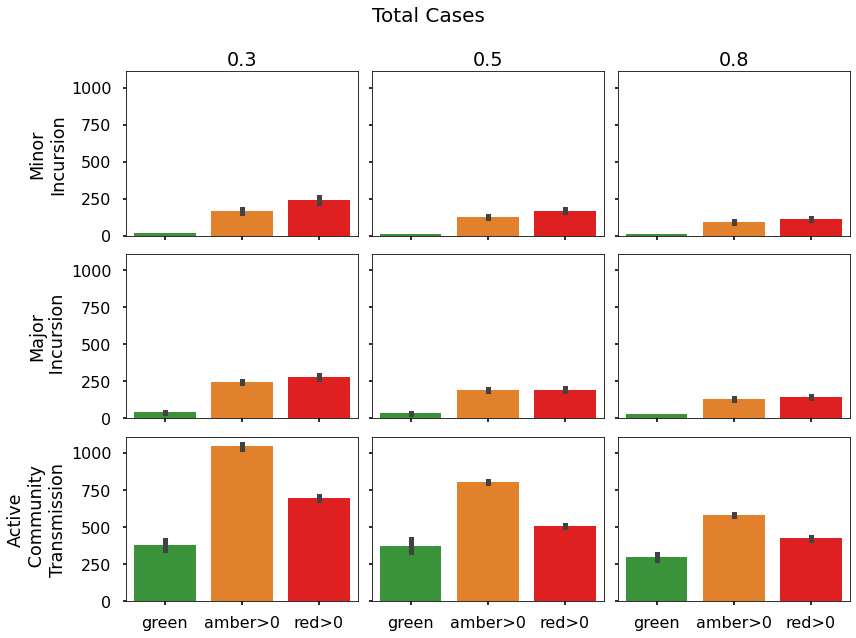

In [7]:
##Amber lighting for tplusn
#10001 is when at test capacity initially
inits=[1,2,10]
pc=0.9

tplusn = [str(k) for k in range(30)]
# Grouped bar plot of CASES
fig,ax = plt.subplots(figsize=(12,9), 
                      nrows=len(inits), ncols=len(detects),
                     sharex=True, sharey=True, squeeze=False,
                     )

ylabel ={
    1:"Minor\nIncursion",
    2:"Major\n Incursion",
    10:"Active\n Community\nTransmission",
}

for i,init in enumerate(inits):
    for j, detect in enumerate(detects):
        nrow =i
        ncol = j
        df = pd.DataFrame()
        for days in ("-2"):
            for gens in ("1"):
                for file in glob.glob(path+"*"+days+"init_"+str(init)+"_detect"+"*"+str(detect)+"_gens"+gens+".csv"):
                    temp = pd.read_csv(file)
                    #temp['detect'] = float(detect)
                    temp['N_Gens'] = int(gens)
                    temp = temp.loc[temp.pc==pc]
        
        #green = temp[tplusn].rolling(7,axis=1).mean().applymap(lambda x: x<=0.1)
        red = temp[tplusn].rolling(7,axis=1).mean().applymap(lambda x: (x>(1-0.75)) )
        amber = temp[tplusn].rolling(7,axis=1).mean().applymap(lambda x: (x>(1-0.9)))

        #average time in amber
        time_amber = amber.mean(axis=1)
        temp['amber>0'] = (time_amber>0)
        temp['time_red'] = red.mean(axis=1)
        temp['red>0'] = (temp.time_red>0)
        temp['green'] = ~temp['amber>0']
        temp['amber>0'] = temp['amber>0'].astype(int) - temp['red>0'].astype(int)
        
        x = temp[['green','amber>0','red>0']].stack().astype(int)#[ 'green' if x==True else 'amber' for x in temp['amber>0'] ]
        
        temp['alerts']=pd.Series(pd.Categorical(x[x!=0].index.get_level_values(1))).values
        sns.barplot(
            y='cases',
            x='alerts',
            order=['green','amber>0','red>0'],
            palette=['C2','C1','red'],
            data=temp,
            ax=ax[i,j]
        )
                        

        if nrow==0:
            ax[nrow,ncol].set_title(detect)
        if nrow==len(inits)-1:
            ax[nrow,ncol].set_xlabel("")#In amber for 1 day or more")
        else:
            ax[nrow,ncol].set_xlabel("")
            
        if ncol==0:
            ax[nrow,ncol].set_ylabel(ylabel[init])
        else:
            ax[nrow,ncol].set_ylabel("")
fig.suptitle("Total Cases", fontsize=20)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.savefig("figs/cases_COP_tplusn_"+str(n)+".png",dpi=120)
plt.show()

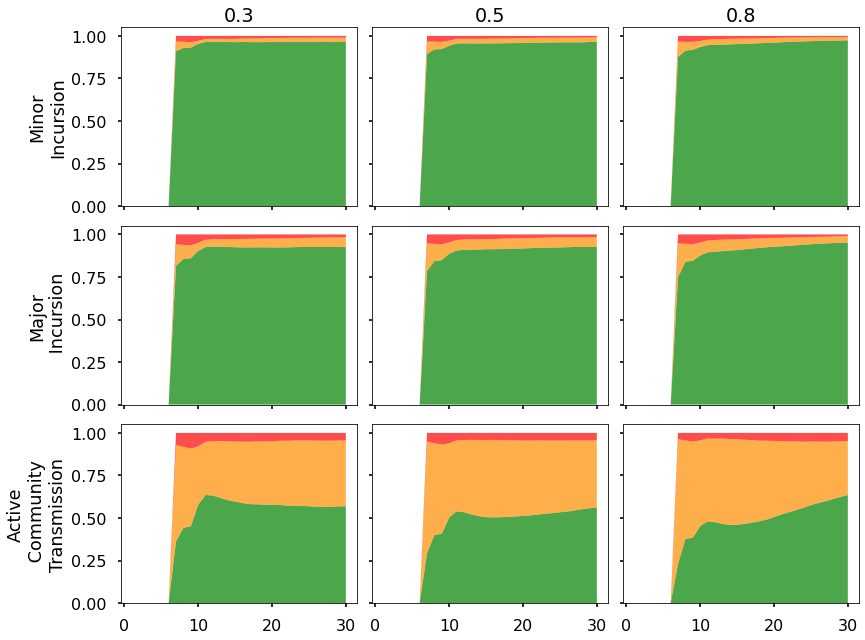

In [8]:
##Amber lighting for just n


inits=[1,2,10]

justn = [str(k)+"COP_n" for k in range(30)]
# Grouped bar plot of CASES
fig,ax = plt.subplots(figsize=(12,9), 
                      nrows=len(inits), ncols=len(detects),
                     sharex=True, sharey=True, squeeze=False,
                     )

ylabel ={
    1:"Minor\nIncursion",
    2:"Major\n Incursion",
    10:"Active\n Community\nTransmission",
}

for i,init in enumerate(inits):
    for j, detect in enumerate(detects):
        nrow =i
        ncol = j
        df = pd.DataFrame()
        for days in ("-2"):
            for gens in ("1"):
                for file in glob.glob(path+"*"+days+"init_"+str(init)+"_detect"+"*"+str(detect)+"_gens"+gens+".csv"):
                    temp = pd.read_csv(file)
                    #temp['detect'] = float(detect)
                    temp['N_Gens'] = int(gens)
                    df = df.append(temp)
        df.pc = ["$%s$" % x for x in df.pc]
        df.DAYS = df.DAYS.astype(int)
        
        green = temp[justn].rolling(7,axis=1).mean().applymap(lambda x: x==0)
        amber = temp[justn].rolling(7,axis=1).mean().applymap(lambda x: (x<0.05) & (x>0))
        red = temp[justn].rolling(7,axis=1).mean().applymap(lambda x: x>=0.05)
        
        ax[i,j].stackplot(range(1,31), green.mean(axis=0),amber.mean(axis=0),red.mean(axis=0),
                          colors=('green', 'darkorange','red'), alpha=0.7
                            )
        #for k in range(5):
        #    ax[i,j].plot(range(1,31), temp.loc[k*3, tplusn], color='black', alpha=0.8, linewidth=0.4)
        if nrow==0:
            ax[nrow,ncol].set_title(detect)
        if nrow==len(inits):
            ax[nrow,ncol].set_xlabel("Days")
        else:
            ax[nrow,ncol].set_xlabel("")
            
        if ncol==0:
            ax[nrow,ncol].set_ylabel(ylabel[init])
        else:
            ax[nrow,ncol].set_ylabel("")
plt.tight_layout()            
plt.savefig("figs/traffic_COP_n_"+str(n)+".png",dpi=120)
plt.show()

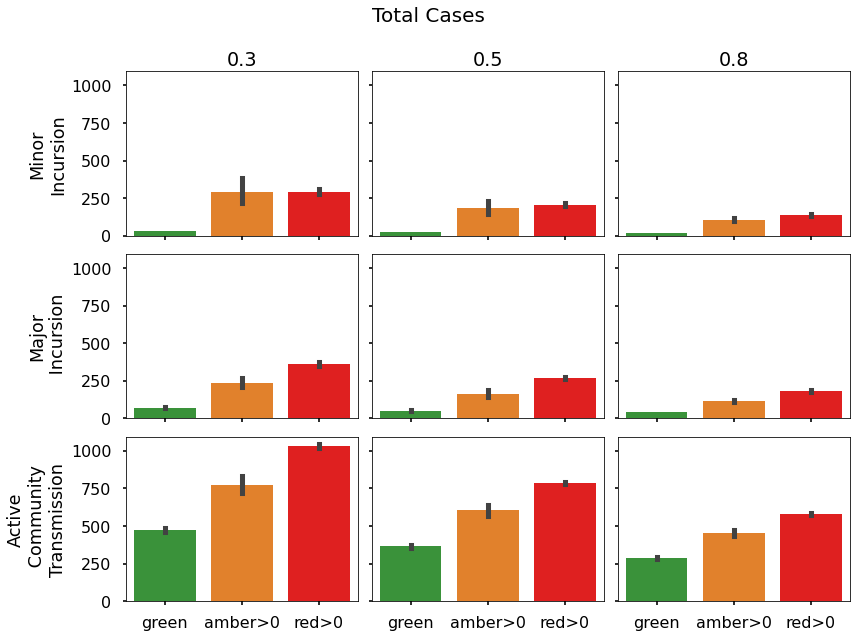

In [9]:
##Amber lighting for justn
#10001 is when at test capacity initially

inits=[1,2,10]
pc=0.9

justn = [str(k)+"COP_n" for k in range(30)]
# Grouped bar plot of CASES
fig,ax = plt.subplots(figsize=(12,9), 
                      nrows=len(inits), ncols=len(detects),
                     sharex=True, sharey=True, squeeze=False,
                     )

ylabel ={
    1:"Minor\nIncursion",
    2:"Major\n Incursion",
    10:"Active\n Community\nTransmission",
}

for i,init in enumerate(inits):
    for j, detect in enumerate(detects):
        nrow =i
        ncol = j
        df = pd.DataFrame()
        for days in ("-2"):
            for gens in ("1"):
                for file in glob.glob(path+"*"+days+"init_"+str(init)+"_detect"+"*"+str(detect)+"_gens"+gens+".csv"):
                    temp = pd.read_csv(file)
                    #temp['detect'] = float(detect)
                    temp['N_Gens'] = int(gens)
                    temp = temp.loc[temp.pc==pc]
        
        #green = temp[tplusn].applymap(lambda x: x==0)
        red = temp[justn].applymap(lambda x: (x>0.05))
        amber = temp[justn].rolling(7,axis=1).mean().applymap(lambda x: x>0)
        
        #average time in amber
        time_amber = amber.mean(axis=1)
        temp['amber>0'] = (time_amber>0)
        temp['time_red'] = red.mean(axis=1)
        temp['red>0'] = (temp.time_red>0)
        temp['green'] = ~temp['amber>0']
        temp['amber>0'] = temp['amber>0'].astype(int) - temp['red>0'].astype(int)
        
        x = temp[['green','amber>0','red>0']].stack().astype(int)#[ 'green' if x==True else 'amber' for x in temp['amber>0'] ]
        
        temp['alerts']=pd.Series(pd.Categorical(x[x!=0].index.get_level_values(1))).values
        sns.barplot(
            y='cases',
            x='alerts',
            order=['green','amber>0','red>0'],
            palette=['C2','C1','red'],
            data=temp,
            ax=ax[i,j]
        )
                      

        if nrow==0:
            ax[nrow,ncol].set_title(detect)
        if nrow==len(inits)-1:
            ax[nrow,ncol].set_xlabel("")#In amber for 1 day or more")
        else:
            ax[nrow,ncol].set_xlabel("")
            
        if ncol==0:
            ax[nrow,ncol].set_ylabel(ylabel[init])
        else:
            ax[nrow,ncol].set_ylabel("")
fig.suptitle("Total Cases", fontsize=20)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.savefig("figs/cases_COP_n_"+str(n)+".png",dpi=120)
plt.show()

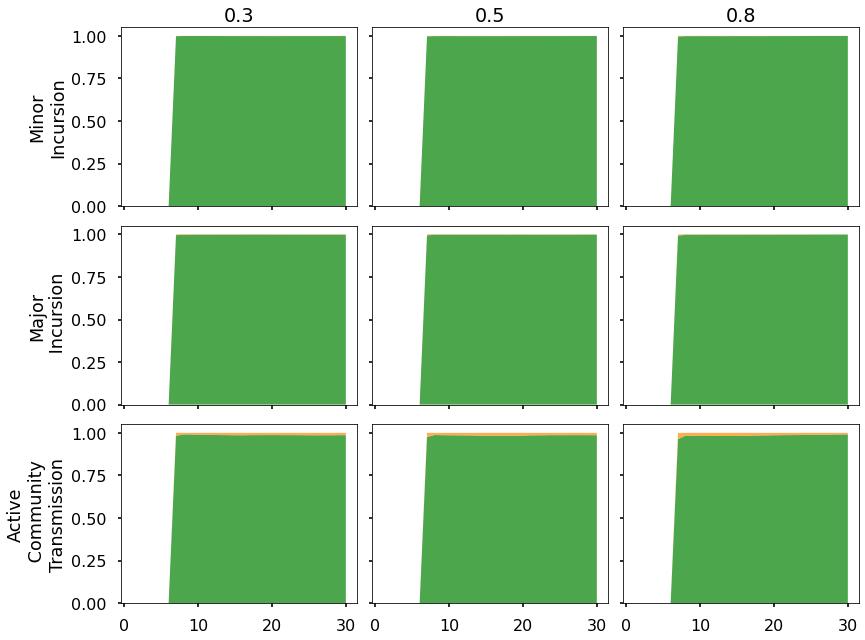

In [10]:
##Amber lighting for tracing


inits=[1,2,10]

justa = [str(k)+".1" for k in range(30)]
# Grouped bar plot of CASES
fig,ax = plt.subplots(figsize=(12,9), 
                      nrows=len(inits), ncols=len(detects),
                     sharex=True, sharey=True, squeeze=False,
                     )

ylabel ={
    1:"Minor\nIncursion",
    2:"Major\n Incursion",
    10:"Active\n Community\nTransmission",
}

for i,init in enumerate(inits):
    for j, detect in enumerate(detects):
        nrow =i
        ncol = j
        df = pd.DataFrame()
        for days in ("-2"):
            for gens in ("1"):
                for file in glob.glob(path+"*"+days+"init_"+str(init)+"_detect"+"*"+str(detect)+"_gens"+gens+".csv"):
                    temp = pd.read_csv(file)
                    #temp['detect'] = float(detect)
                    temp['N_Gens'] = int(gens)
                    df = df.append(temp)
        df.pc = ["$%s$" % x for x in df.pc]
        df.DAYS = df.DAYS.astype(int)
        
        green = temp[justa].rolling(7,axis=1).mean().applymap(lambda x: x==0)
        amber = temp[justa].rolling(7,axis=1).mean().applymap(lambda x: (x<0.05) & (x>0))
        red = temp[justa].rolling(7,axis=1).mean().applymap(lambda x: x>=0.05)
        
        ax[i,j].stackplot(range(1,31), green.mean(axis=0),amber.mean(axis=0),red.mean(axis=0),
                          colors=('green', 'darkorange','red'), alpha=0.7
                            )
        #for k in range(5):
        #    ax[i,j].plot(range(1,31), temp.loc[k*3, tplusn], color='black', alpha=0.8, linewidth=0.4)
        if nrow==0:
            ax[nrow,ncol].set_title(detect)
        if nrow==len(inits):
            ax[nrow,ncol].set_xlabel("Days")
        else:
            ax[nrow,ncol].set_xlabel("")
            
        if ncol==0:
            ax[nrow,ncol].set_ylabel(ylabel[init])
        else:
            ax[nrow,ncol].set_ylabel("")
plt.tight_layout()            
plt.savefig("figs/traffic_COP_a_"+str(n)+".png",dpi=120)
plt.show()

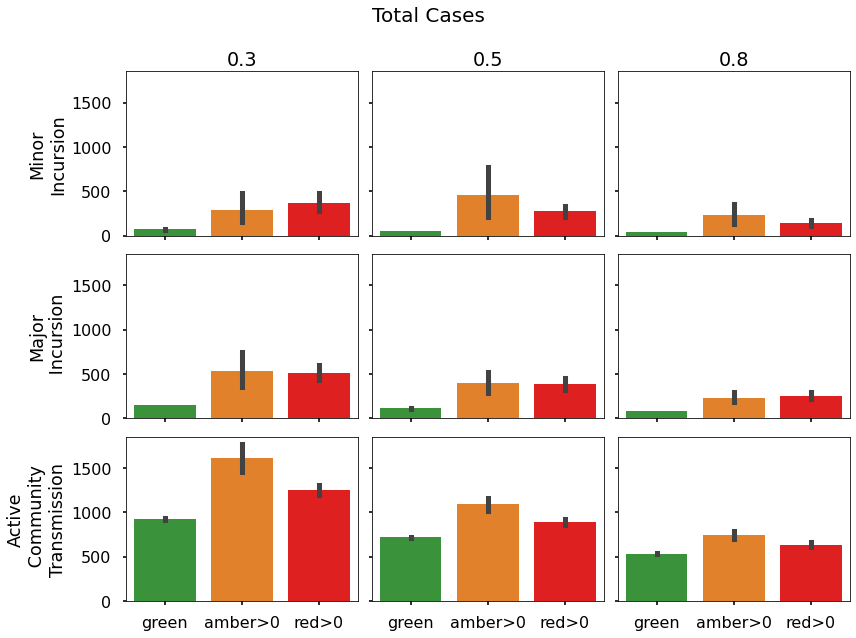

In [11]:
##Amber lighting for tracing
#10001 is when at test capacity initially

inits=[1,2,10]
pc=0.9

justa = [str(k)+".1" for k in range(30)]
# Grouped bar plot of CASES
fig,ax = plt.subplots(figsize=(12,9), 
                      nrows=len(inits), ncols=len(detects),
                     sharex=True, sharey=True, squeeze=False,
                     )

ylabel ={
    1:"Minor\nIncursion",
    2:"Major\n Incursion",
    10:"Active\n Community\nTransmission",
}

for i,init in enumerate(inits):
    for j, detect in enumerate(detects):
        nrow =i
        ncol = j
        df = pd.DataFrame()
        for days in ("-2"):
            for gens in ("1"):
                for file in glob.glob(path+"*"+days+"init_"+str(init)+"_detect"+str(detect)+"_gens"+gens+".csv"):
                    temp = pd.read_csv(file)
                    #temp['detect'] = float(detect)
                    temp['N_Gens'] = int(gens)
                    temp = temp.loc[temp.pc==pc]
        
        #green = temp[tplusn].applymap(lambda x: x==0)
        red = temp[justa].applymap(lambda x: (x>0.05))
        amber = temp[justa].rolling(7,axis=1).mean().applymap(lambda x: x>0)
        
        #average time in amber
        time_amber = amber.mean(axis=1)
        temp['amber>0'] = (time_amber>0)
        temp['time_red'] = red.mean(axis=1)
        temp['red>0'] = (temp.time_red>0)
        temp['green'] = ~temp['amber>0']
        temp['amber>0'] = temp['amber>0'].astype(int) - temp['red>0'].astype(int)
        
        x = temp[['green','amber>0','red>0']].stack().astype(int)#[ 'green' if x==True else 'amber' for x in temp['amber>0'] ]
        
        temp['alerts']=pd.Series(pd.Categorical(x[x!=0].index.get_level_values(1))).values
        sns.barplot(
            y='cases',
            x='alerts',
            order=['green','amber>0','red>0'],
            palette=['C2','C1','red'],
            data=temp,
            ax=ax[i,j]
        )
                      

        if nrow==0:
            ax[nrow,ncol].set_title(detect)
        if nrow==len(inits)-1:
            ax[nrow,ncol].set_xlabel("")#In amber for 1 day or more")
        else:
            ax[nrow,ncol].set_xlabel("")
            
        if ncol==0:
            ax[nrow,ncol].set_ylabel(ylabel[init])
        else:
            ax[nrow,ncol].set_ylabel("")
fig.suptitle("Total Cases", fontsize=20)
fig.tight_layout()
fig.subplots_adjust(top=0.88)
plt.savefig("figs/cases_COP_a_"+str(n)+".png",dpi=120)
plt.show()

In [13]:
temp.columns.values

array(['0', '0COP_n', '1', '10', '10COP_n', '11', '12', '13', '14', '15',
       '16', '17', '18', '19', '1COP_n', '2', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '2COP_n', '3', '3COP_n', '4',
       '4COP_n', '5', '5COP_n', '6', '6COP_n', '7', '7COP_n', '8',
       '8COP_n', '9', '9COP_n', 'DAYS', 'actual_gen_times_mean',
       'avg_daily_growth_rate', 'cases', 'die_out', 'pc',
       'secondary_cases_25', 'secondary_cases_75', 'secondary_cases_mean',
       'sim', '11COP_n', '12COP_n', '13COP_n', '14COP_n', '15COP_n',
       '16COP_n', '17COP_n', '18COP_n', '19COP_n', '20COP_n', '21COP_n',
       '22COP_n', '23COP_n', '24COP_n', '25COP_n', '26COP_n', '27COP_n',
       '28COP_n', '29COP_n', '0.1', '1.1', '2.1', '3.1', '4.1', '5.1',
       '6.1', '7.1', '8.1', '9.1', '10.1', '11.1', '12.1', '13.1', '14.1',
       '15.1', '16.1', '17.1', '18.1', '19.1', '20.1', '21.1', '22.1',
       '23.1', '24.1', '25.1', '26.1', '27.1', '28.1', '29.1', 'detect',
       'N_Gen

In [14]:
red.mean(axis=1)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
30010    0.0
30011    0.0
30012    0.0
30013    0.0
30014    0.0
Length: 30015, dtype: float64

,DAYS,pc,N_Gens,die_out
1,-3,$0.5$,2,0.691862
3,-3,$0.75$,2,0.721156
5,-3,$0.9$,2,0.737253
7,-3,$1.0$,2,0.739652
9,-2,$0.5$,2,0.694161
11,-2,$0.75$,2,0.708758
13,-2,$0.9$,2,0.722555
15,-2,$1.0$,2,0.729954
0,-3,$0.5$,1,0.693061
2,-3,$0.75$,1,0.708758


8     0.691762
10    0.701560
12    0.708458
14    0.712657
Name: die_out, dtype: float64

,DAYS,pc,N_Gens,die_out,Baseline,Improvement,Scenario
1,-3,$0.5$,2,0.691862,0.691762,0.000100,"Days =-3, N_Gens=2"
3,-3,$0.75$,2,0.721156,0.701560,0.019596,"Days =-3, N_Gens=2"
5,-3,$0.9$,2,0.737253,0.708458,0.028794,"Days =-3, N_Gens=2"
7,-3,$1.0$,2,0.739652,0.712657,0.026995,"Days =-3, N_Gens=2"
9,-2,$0.5$,2,0.694161,0.691762,0.002400,"Days =-2, N_Gens=2"
11,-2,$0.75$,2,0.708758,0.701560,0.007199,"Days =-2, N_Gens=2"
13,-2,$0.9$,2,0.722555,0.708458,0.014097,"Days =-2, N_Gens=2"
15,-2,$1.0$,2,0.729954,0.712657,0.017297,"Days =-2, N_Gens=2"
0,-3,$0.5$,1,0.693061,0.691762,0.001300,"Days =-3, N_Gens=1"
2,-3,$0.75$,1,0.708758,0.701560,0.007199,"Days =-3, N_Gens=1"


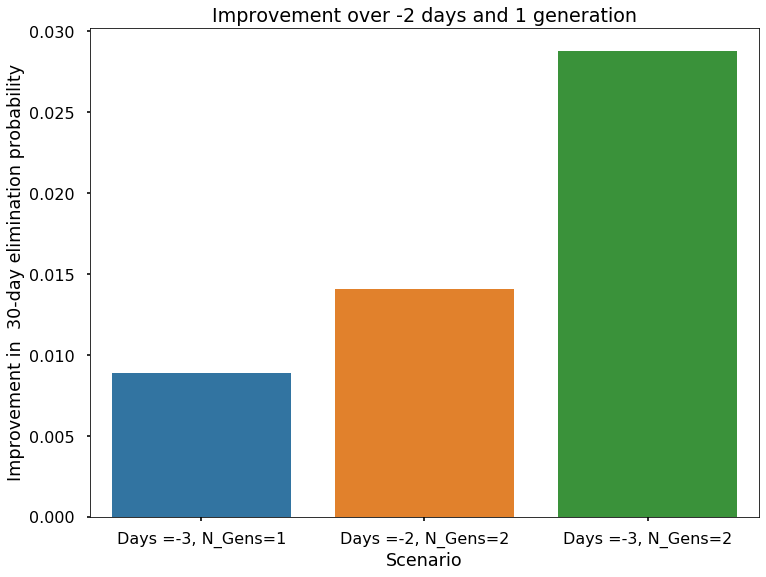

In [20]:
# Plot for detect = 0.3

detect = 0.3

df_plot = df

## Filter to days = -2,-3
day_list = [-1, -0]
df_plot = df_plot[~df_plot.DAYS.isin(day_list)]

# Filter to detect = 0.3
df_plot = df_plot.loc[df_plot.detect==detect]
mean_col = df_plot.groupby(['DAYS','pc','N_Gens']).die_out.mean().reset_index()
mean_col = mean_col.sort_values(by=['N_Gens'],ascending=False)

# Baseline information
display(mean_col)
mean_col_baseline = mean_col.loc[mean_col.DAYS==-2]
mean_col_baseline = mean_col_baseline.loc[mean_col_baseline.N_Gens==1]
baseline_probs = mean_col_baseline['die_out']
display(baseline_probs)
baseline_probs = [baseline_probs]*4
baseline_probs_flat = []
for sublist in baseline_probs:
    for item in sublist:
        baseline_probs_flat.append(item)
        
# Add baseline to data frame
mean_col['Baseline'] = baseline_probs_flat
#print(mean_col)

# Calculate difference between basline 
mean_col['Improvement'] = mean_col['die_out'] - mean_col['Baseline']
#print(mean_col)

mean_col["Scenario"] = 'Days =' +  mean_col["DAYS"].astype(str) + ', N_Gens=' + mean_col["N_Gens"].astype(str)
#print(mean_col)


mean_col = mean_col.loc[mean_col.Scenario!='Days =-2, N_Gens=1']

display(mean_col)
# Grouped bar plot

fig,ax = plt.subplots(figsize=(12,9))


sns.barplot(x='Scenario',
            order=["Days =-3, N_Gens=1", "Days =-2, N_Gens=2", "Days =-3, N_Gens=2"],
            y='Improvement',
            data=mean_col.loc[mean_col.pc=="$0.9$"],
            #hue='pc',
            errwidth=0)

ax.set_ylabel("Improvement in  30-day elimination probability")
ax.set_title("Improvement over -2 days and 1 generation")
plt.show()

    DAYS      pc  N_Gens   die_out  Baseline  Improvement
1     -3   $0.5$       2  0.667267  0.667067     0.000200
3     -3  $0.75$       2  0.694061  0.678064     0.015997
5     -3   $0.9$       2  0.701360  0.680764     0.020596
7     -3   $1.0$       2  0.700260  0.687962     0.012298
9     -2   $0.5$       2  0.668266  0.667067     0.001200
11    -2  $0.75$       2  0.682963  0.678064     0.004899
13    -2   $0.9$       2  0.690962  0.680764     0.010198
15    -2   $1.0$       2  0.700260  0.687962     0.012298
0     -3   $0.5$       1  0.665067  0.667067    -0.002000
2     -3  $0.75$       1  0.674265  0.678064    -0.003799
4     -3   $0.9$       1  0.680964  0.680764     0.000200
6     -3   $1.0$       1  0.688962  0.687962     0.001000
8     -2   $0.5$       1  0.667067  0.667067     0.000000
10    -2  $0.75$       1  0.678064  0.678064     0.000000
12    -2   $0.9$       1  0.680764  0.680764     0.000000
14    -2   $1.0$       1  0.687962  0.687962     0.000000
    DAYS      

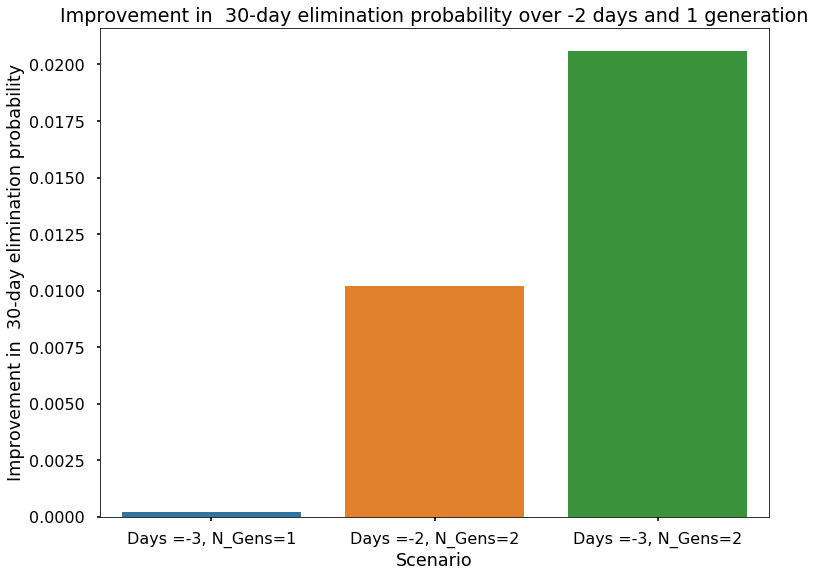

In [21]:
# Plot for detect = 0.1

detect = 0.1

df_plot = df

## Filter to days = -2,-3
day_list = [-1, -0]
df_plot = df_plot[~df_plot.DAYS.isin(day_list)]

# Filter to detect = 0.1
df_plot = df_plot.loc[df_plot.detect==detect]
mean_col = df_plot.groupby(['DAYS','pc','N_Gens']).die_out.mean().reset_index()
mean_col = mean_col.sort_values(by=['N_Gens'],ascending=False)

# Baseline information
mean_col_baseline = mean_col.loc[mean_col.DAYS==-2]
mean_col_baseline = mean_col_baseline.loc[mean_col_baseline.N_Gens==1]
baseline_probs = mean_col_baseline['die_out']
baseline_probs = [baseline_probs]*4
baseline_probs_flat = []
for sublist in baseline_probs:
    for item in sublist:
        baseline_probs_flat.append(item)
        
# Add baseline to data frame
mean_col['Baseline'] = baseline_probs_flat
#print(mean_col)

# Calculate difference between basline 
mean_col['Improvement'] = mean_col['die_out'] - mean_col['Baseline']
print(mean_col)


mean_col["Scenario"] = 'Days =' +  mean_col["DAYS"].astype(str) + ', N_Gens=' + mean_col["N_Gens"].astype(str)
print(mean_col)

mean_col = mean_col.loc[mean_col.Scenario!='Days =-2, N_Gens=1']


# Grouped bar plot

fig,ax = plt.subplots(figsize=(12,9))


sns.barplot(x='Scenario',
            order=["Days =-3, N_Gens=1", "Days =-2, N_Gens=2", "Days =-3, N_Gens=2"],
            y='Improvement',
            data=mean_col.loc[mean_col.pc=="$0.9$"],
            #hue='pc',
            errwidth=0)

ax.set_ylabel("Improvement in  30-day elimination probability")
ax.set_title("Improvement in  30-day elimination probability over -2 days and 1 generation")
plt.show()
